In [1]:
import pandas as pd

df = pd.read_csv('../../input/clean_annual_wb_fred.csv')
df = df[df['year'] <= 2019]
df = df.rename(columns={"economy" : "isocode"})

df["date"] = pd.to_datetime(df["year"].astype(str) + "-01-01")
df.drop(columns="year", inplace=True)  # optional cleanup

# Selecting relevant columns
static_cols = ['isocode', 'date', '1DLGDP']
lag_cols = df.columns[df.columns.str.endswith('_L1') | df.columns.str.endswith('_L2')]
cols_to_include = static_cols + lag_cols.to_list()
df = df[cols_to_include].copy()
df = df.reset_index(drop=True)
df.drop(columns=['GDPGR_L1', '1DGDPGR_L2'], inplace=True)
print("Number of units: ", df["isocode"].nunique())
df

Number of units:  150


,isocode,date,1DLGDP,1DLGDP_L1,1DLGDP_L2,LEND_L2,RRATE_L2,1DDEBT_L2,2DLGOVCON_L1,2DLGFKF_L1,...,FEDFUNDS_L2,WUI_L1,WUI_L2,1DUST10_L2,1DUSYIELD_L1,1DUSRRATE_L2,1DFEDFUNDS_L2,1DLWTI_L2,2DLWTI_L1,1DWUI_L1
0,AFE,1980-01-01,5.318699,2.888342,1.476127,-1047.943026,3233.626846,942.444337,-0.238242,-2.852747,...,7.94,0.127085,0.049690,0.99,0.446788,0.790596,2.40,3.802009,37.321956,0.077395
1,AFE,1981-01-01,3.934116,5.318699,2.888342,-696.596459,3302.639800,2367.068244,1.894273,5.105715,...,11.20,0.062158,0.127085,1.02,2.251840,0.699691,3.26,41.123965,10.052287,-0.064928
2,AFE,1982-01-01,0.315334,3.934116,5.318699,-773.999721,3305.102706,2064.786489,-1.640130,2.037248,...,13.35,0.090546,0.062158,2.00,3.496616,1.173846,2.15,51.176252,-53.088738,0.028388
3,AFE,1983-01-01,0.039939,0.315334,3.934116,-1061.529652,3261.282561,894.782927,4.062284,-10.022484,...,16.39,0.092837,0.090546,2.49,0.737551,1.535289,3.04,-1.912486,-6.715538,0.002292
4,AFE,1984-01-01,3.310964,0.039939,0.315334,-1080.113180,3256.543016,803.989451,-2.333217,-8.376349,...,12.24,0.099054,0.092837,-0.91,-1.340747,-0.811175,-4.15,-8.628025,-1.503855,0.006217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,ZWE,2015-01-01,2.003446,1.473631,3.146699,9.740000,1.525435,-43.697495,49.351208,38.816294,...,0.11,0.147042,0.222608,0.55,-0.290000,0.301093,-0.03,3.888341,-8.782777,-0.075565
5996,ZWE,2016-01-01,0.896921,2.003446,1.473631,9.467500,8.787605,-40.893438,-3.369751,-6.577338,...,0.09,0.268378,0.147042,0.19,1.170000,0.324125,-0.02,-4.894436,-60.099289,0.121336
5997,ZWE,2017-01-01,3.999218,0.896921,2.003446,8.541771,8.144427,-38.118247,-2.389474,-4.906594,...,0.13,0.214639,0.268378,-0.40,0.430000,-0.022944,0.04,-64.993725,52.904802,-0.053739
5998,ZWE,2018-01-01,4.888413,3.999218,0.896921,7.113333,4.998563,-43.237287,1.207511,3.889627,...,0.39,0.185867,0.214639,-0.30,-1.670000,-0.168375,0.26,-12.088924,28.589441,-0.028772


In [2]:
isocode_list = ["ESP", "USA"]


🔍 Target: ESP — Top donor scores:
  MDG: 0.3557
  CUB: 0.3527
  GBR: 0.3468
  CHE: 0.3434
  FIN: 0.3422
  HUN: 0.3379
  LCN: 0.3275
  TLA: 0.3261
  SEN: 0.3238
  FRA: 0.3228
Epoch 0 — Avg MSE: 4.8819, Bundle Size: 81
Epoch 10 — Avg MSE: 5.8435, Bundle Size: 69
Epoch 20 — Avg MSE: 6.4110, Bundle Size: 64
Epoch 30 — Avg MSE: 5.2301, Bundle Size: 51
Epoch 40 — Avg MSE: 5.5127, Bundle Size: 59
Epoch 50 — Avg MSE: 5.3705, Bundle Size: 43
Epoch 60 — Avg MSE: 5.3434, Bundle Size: 50
Epoch 70 — Avg MSE: 4.0002, Bundle Size: 44
Epoch 80 — Avg MSE: 5.7108, Bundle Size: 56
Epoch 90 — Avg MSE: 5.4692, Bundle Size: 46
Epoch 100 — Avg MSE: 5.6872, Bundle Size: 40
Epoch 110 — Avg MSE: 3.9187, Bundle Size: 48
Epoch 120 — Avg MSE: 5.2277, Bundle Size: 47
Epoch 130 — Avg MSE: 5.4458, Bundle Size: 49
Epoch 140 — Avg MSE: 5.7439, Bundle Size: 49
Epoch 150 — Avg MSE: 5.5146, Bundle Size: 43
Epoch 160 — Avg MSE: 4.3497, Bundle Size: 46
Epoch 170 — Avg MSE: 5.7785, Bundle Size: 53
Epoch 180 — Avg MSE: 5.200

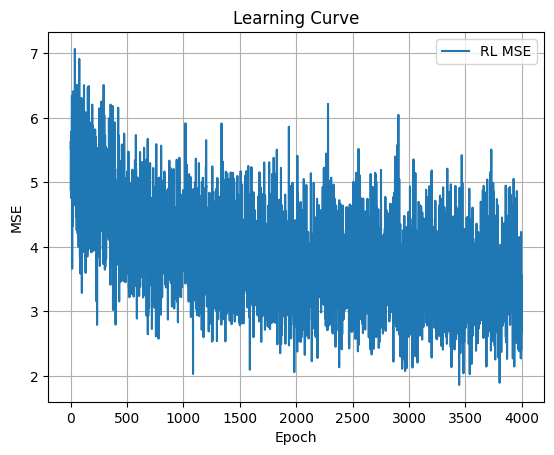

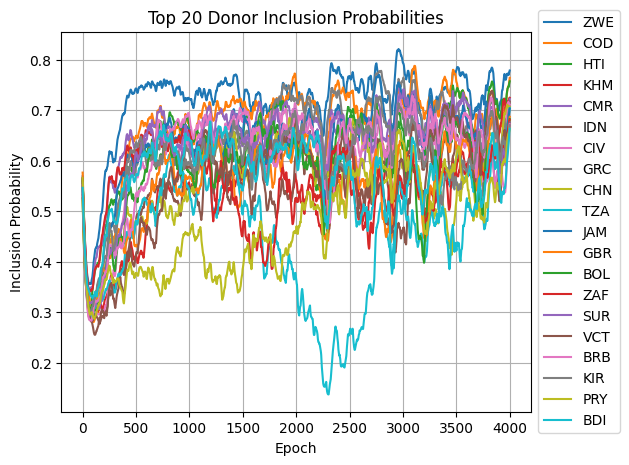


🔍 Target: USA — Top donor scores:
  MDG: 0.4051
  MMR: 0.3814
  JAM: 0.3697
  NGA: 0.3687
  KEN: 0.3609
  COL: 0.3592
  NAC: 0.3560
  BRA: 0.3555
  NLD: 0.3553
  HUN: 0.3550
Epoch 0 — Avg MSE: 0.2314, Bundle Size: 81
Epoch 10 — Avg MSE: 0.2031, Bundle Size: 69
Epoch 20 — Avg MSE: 0.2428, Bundle Size: 63
Epoch 30 — Avg MSE: 0.2239, Bundle Size: 51
Epoch 40 — Avg MSE: 0.2238, Bundle Size: 65
Epoch 50 — Avg MSE: 0.2134, Bundle Size: 48
Epoch 60 — Avg MSE: 0.2610, Bundle Size: 66
Epoch 70 — Avg MSE: 0.2097, Bundle Size: 57
Epoch 80 — Avg MSE: 0.2962, Bundle Size: 69
Epoch 90 — Avg MSE: 0.2464, Bundle Size: 65
Epoch 100 — Avg MSE: 0.3073, Bundle Size: 74
Epoch 110 — Avg MSE: 0.2743, Bundle Size: 67
Epoch 120 — Avg MSE: 0.2640, Bundle Size: 77
Epoch 130 — Avg MSE: 0.4999, Bundle Size: 74
Epoch 140 — Avg MSE: 0.2282, Bundle Size: 75
Epoch 150 — Avg MSE: 0.3997, Bundle Size: 79
Epoch 160 — Avg MSE: 0.5416, Bundle Size: 77
Epoch 170 — Avg MSE: 0.2206, Bundle Size: 78
Epoch 180 — Avg MSE: 0.254

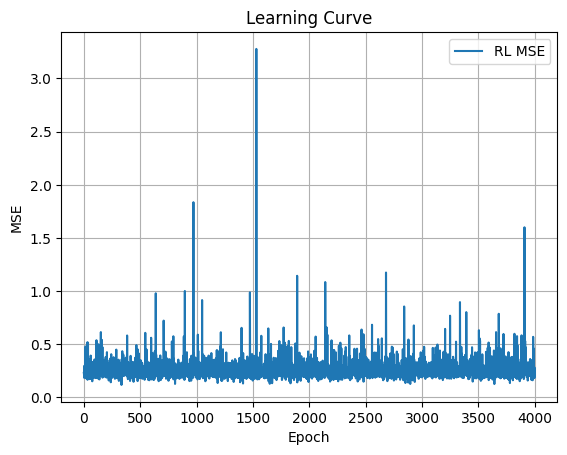

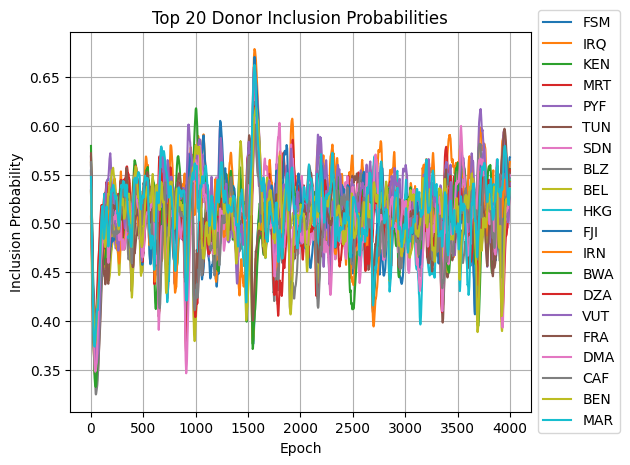

In [3]:
import torch
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from OptimalPanel.optimizer import OptimalBundleRL

for isocode in isocode_list:
    
    # --- Configuration ---
    unit_col = 'isocode'
    time_col = 'date'
    target_col = '1DLGDP'
    target_unit = isocode
    feature_cols = df.columns.difference([unit_col, time_col, target_col])
    forecast_times = list(pd.date_range(start="2010-01-01", end="2019-01-01", freq="YS"))
    total_epochs = 4000

    # --- Cutoff for similarity training ---
    train_cutoff = pd.to_datetime("2000-01-01")
    test_start = pd.to_datetime("2001-01-01")
    test_end = pd.to_datetime("2009-01-01")

    # --- Target test set ---
    target_test_df = df[(df[unit_col] == target_unit) & (df[time_col].between(test_start, test_end))]
    X_target_test = target_test_df[feature_cols]
    y_target_test = target_test_df[target_col]

    # --- Train models for each country and compute similarity ---
    country_rmse = {}

    for iso in df[unit_col].unique():
        train_df = df[(df[unit_col] == iso) & (df[time_col] <= train_cutoff)]
        if len(train_df) < 5 or len(X_target_test) == 0:
            continue
        
        X_train = train_df[feature_cols]
        y_train = train_df[target_col]

        model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_target_test)
        rmse = sqrt(mean_squared_error(y_target_test, y_pred))
        country_rmse[iso] = rmse

    if len(country_rmse) < 5:
        print(f"⚠️ Skipping {target_unit} — insufficient valid donors")
        continue

    # --- Convert to similarity ---
    similarity_rmse_df = pd.DataFrame.from_dict(country_rmse, orient='index', columns=['RMSE'])
    similarity_rmse_df = similarity_rmse_df.sort_values(by='RMSE')

    donor_isos = similarity_rmse_df.index.drop(target_unit, errors='ignore').tolist()
    similarity_scores = 1 / (1 + similarity_rmse_df.loc[donor_isos, 'RMSE'].values)
    sim_tensor = torch.tensor(similarity_scores, dtype=torch.float32)

    print(f"\n🔍 Target: {target_unit} — Top donor scores:")
    for iso, score in zip(donor_isos[:10], similarity_scores[:10]):
        print(f"  {iso}: {score:.4f}")  

    # --- RL Optimization ---
    rl = OptimalBundleRL(
        df=df,
        unit_col=unit_col,
        time_col=time_col,
        target_col=target_col,
        feature_cols=feature_cols,
        target_unit=target_unit,
        donor_units=donor_isos,
        similarities=sim_tensor,
        forecast_times=forecast_times
    )

    rl.train(
        n_epochs=total_epochs,
        save=True,
        save_path=f"results/annual/ESP_5000/results_{target_unit}.pkl"
    )
    
    rl.plot_learning_curve()
    rl.plot_donor_probs(top_n=20)

In [4]:
import os 
import pickle

results_dir="results/annual/ESP_5000"

for filename in os.listdir(results_dir):
    if filename.endswith(".pkl") and filename.startswith("results_"):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, "rb") as f:
            results = pickle.load(f)

        top_bundles = results["top_bundles"]
        target_unit = results["target_unit"]
        top_k = 1
        for rank, (mse, bundle, epoch) in enumerate(top_bundles[:top_k], 1):
            print(f"{rank}. Country: {target_unit}, MSE: {mse:.4f}, Bundle Size: {len(bundle)}, Bundle: {bundle}")

1. Country: ESP, MSE: 1.8588, Bundle Size: 63, Bundle: ['MDG', 'GBR', 'CHE', 'TLA', 'FRA', 'SWE', 'DEU', 'JAM', 'PRT', 'BRA', 'DNK', 'GAB', 'ZAF', 'HIC', 'COL', 'AUS', 'TGO', 'NZL', 'MUS', 'BEL', 'ECU', 'NOR', 'CAF', 'NGA', 'MEX', 'ISL', 'BHS', 'EMU', 'GTM', 'GRC', 'AFE', 'ZWE', 'CMR', 'GIN', 'NIC', 'ATG', 'VCT', 'SLV', 'SUR', 'BRB', 'BLZ', 'LUX', 'EGY', 'DOM', 'SAS', 'TSA', 'COD', 'NPL', 'PAK', 'BGD', 'THA', 'BDI', 'PLW', 'TUN', 'ARG', 'IRL', 'SWZ', 'DMA', 'BTN', 'SYR', 'KHM', 'SDN', 'HTI']
1. Country: USA, MSE: 0.1178, Bundle Size: 73, Bundle: ['MDG', 'MMR', 'COL', 'NAC', 'BRA', 'EMU', 'CHE', 'ECU', 'HND', 'NZL', 'DEU', 'ESP', 'GBR', 'PRY', 'LCN', 'FRA', 'CAN', 'URY', 'TTO', 'DZA', 'FJI', 'CIV', 'MWI', 'ZMB', 'BEL', 'PRT', 'NOR', 'NIC', 'SEN', 'MRT', 'COG', 'LKA', 'AUS', 'GTM', 'BFA', 'GHA', 'LBY', 'HKG', 'GMB', 'COD', 'MUS', 'FSM', 'GNB', 'CRI', 'VCT', 'NPL', 'BGD', 'QAT', 'MAR', 'CHL', 'ARE', 'BEN', 'OMN', 'EGY', 'PLW', 'TSA', 'SWZ', 'PER', 'PYF', 'CYP', 'SLE', 'BWA', 'SDN', 'MYS',